In [125]:
import pandas as pd
import seaborn as sns
import requests
import json
import numpy as np
from scipy import signal
from datetime import datetime, timedelta

In [2]:
cpi = pd.read_csv('cpi_2000_2023.csv')
print(len(cpi))
cpi.tail(n=10)

404


,DATE,CPI,CPI_PERCENT
394,2022-11-01,297.711,7.1
395,2022-12-01,296.797,6.5
396,2023-01-01,299.170,6.4
397,2023-02-01,300.840,6.0
398,2023-03-01,301.836,5.0
399,2023-04-01,303.363,4.9
400,2023-05-01,304.127,4.0
401,2023-06-01,305.109,3.0
402,2023-07-01,305.691,3.2
403,2023-08-01,307.026,3.7


In [3]:
unrate = pd.read_csv('unemployment_2000_2023.csv')
print(len(unrate))
unrate.tail(n=10)

296


,DATE,UNEMPLOYMENT
286,2022-11-01,3.6
287,2022-12-01,3.5
288,2023-01-01,3.4
289,2023-02-01,3.6
290,2023-03-01,3.5
291,2023-04-01,3.4
292,2023-05-01,3.7
293,2023-06-01,3.6
294,2023-07-01,3.5
295,2023-08-01,3.8


In [4]:
effr = pd.read_csv('effr_2000_2023.csv')
print(len(effr))
effr.tail(n=10)

278


,DATE,EFFR
268,2022-11-01,3.83
269,2022-12-01,4.33
270,2023-01-01,4.33
271,2023-02-01,4.57
272,2023-03-01,4.83
273,2023-04-01,4.83
274,2023-05-01,5.08
275,2023-06-01,5.08
276,2023-07-01,5.33
277,2023-08-01,5.33


In [14]:
merged = unrate.merge(cpi, on='DATE')
merged = merged.merge(effr, on='DATE')

unrate_col = merged.pop('UNEMPLOYMENT')
effr_col = merged.pop('EFFR')

merged['UNEMPLOYMENT'] = unrate_col
merged['EFFR'] = effr_col

merged = merged.drop(['CPI'], axis=1)
merged.dropna(inplace=True)
print(len(merged))
merged.tail()

278


,DATE,CPI_PERCENT,UNEMPLOYMENT,EFFR
273,2023-04-01,4.9,3.4,4.83
274,2023-05-01,4.0,3.7,5.08
275,2023-06-01,3.0,3.6,5.08
276,2023-07-01,3.2,3.5,5.33
277,2023-08-01,3.7,3.8,5.33


In [30]:
merged['CPI_PERCENT_LAG_6M'] = merged['CPI_PERCENT'].shift(6)
merged['CPI_PERCENT_LAG_12M'] = merged['CPI_PERCENT'].shift(12)
merged['UNEMPLOYMENT_LAG_6M'] = merged['UNEMPLOYMENT'].shift(6)
merged['UNEMPLOYMENT_LAG_12M'] = merged['UNEMPLOYMENT'].shift(12)
merged.head()

,DATE,CPI_PERCENT,UNEMPLOYMENT,EFFR,CPI_PERCENT_LAG_6M,CPI_PERCENT_LAG_12M,UNEMPLOYMENT_LAG_6M,UNEMPLOYMENT_LAG_12M
0,2000-07-01,3.7,4.0,6.64,NaN,NaN,NaN,NaN
1,2000-08-01,3.4,4.1,6.65,NaN,NaN,NaN,NaN
2,2000-09-01,3.5,3.9,6.60,NaN,NaN,NaN,NaN
3,2000-10-01,3.4,3.9,6.59,NaN,NaN,NaN,NaN
4,2000-11-01,3.4,3.9,6.62,NaN,NaN,NaN,NaN


In [90]:
merged['EFFR_PERCENT_CHG'] = merged['EFFR'].pct_change()
merged.tail()

,DATE,CPI_PERCENT,UNEMPLOYMENT,EFFR,CPI_PERCENT_LAG_6M,CPI_PERCENT_LAG_12M,UNEMPLOYMENT_LAG_6M,UNEMPLOYMENT_LAG_12M,EFFR_PERCENT_CHG
273,2023-04-01,4.9,3.4,4.83,7.7,8.3,3.7,3.6,0.000000
274,2023-05-01,4.0,3.7,5.08,7.1,8.6,3.6,3.6,0.051760
275,2023-06-01,3.0,3.6,5.08,6.5,9.1,3.5,3.6,0.000000
276,2023-07-01,3.2,3.5,5.33,6.4,8.5,3.4,3.5,0.049213
277,2023-08-01,3.7,3.8,5.33,6.0,8.3,3.6,3.7,0.000000


In [49]:
merged2 = merged[merged['EFFR'] > 1.0]
merged2

,DATE,CPI_PERCENT,UNEMPLOYMENT,EFFR,CPI_PERCENT_LAG_6M,CPI_PERCENT_LAG_12M,UNEMPLOYMENT_LAG_6M,UNEMPLOYMENT_LAG_12M,EFFR_PERCENT_CHG
0,2000-07-01,3.7,4.0,6.64,NaN,NaN,NaN,NaN,NaN
1,2000-08-01,3.4,4.1,6.65,NaN,NaN,NaN,NaN,0.001506
2,2000-09-01,3.5,3.9,6.60,NaN,NaN,NaN,NaN,-0.007519
3,2000-10-01,3.4,3.9,6.59,NaN,NaN,NaN,NaN,-0.001515
4,2000-11-01,3.4,3.9,6.62,NaN,NaN,NaN,NaN,0.004552
...,...,...,...,...,...,...,...,...,...
273,2023-04-01,4.9,3.4,4.83,7.7,8.3,3.7,3.6,0.000000
274,2023-05-01,4.0,3.7,5.08,7.1,8.6,3.6,3.6,0.051760
275,2023-06-01,3.0,3.6,5.08,6.5,9.1,3.5,3.6,0.000000
276,2023-07-01,3.2,3.5,5.33,6.4,8.5,3.4,3.5,0.049213


In [16]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

                             OLS Regression Results                             
Dep. Variable:     UNEMPLOYMENT_LAG_12M   R-squared:                       0.057
Model:                              OLS   Adj. R-squared:                  0.050
Method:                   Least Squares   F-statistic:                     8.009
Date:                  Fri, 15 Sep 2023   Prob (F-statistic):            0.00538
Time:                          09:43:57   Log-Likelihood:                -144.75
No. Observations:                   134   AIC:                             293.5
Df Residuals:                       132   BIC:                             299.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

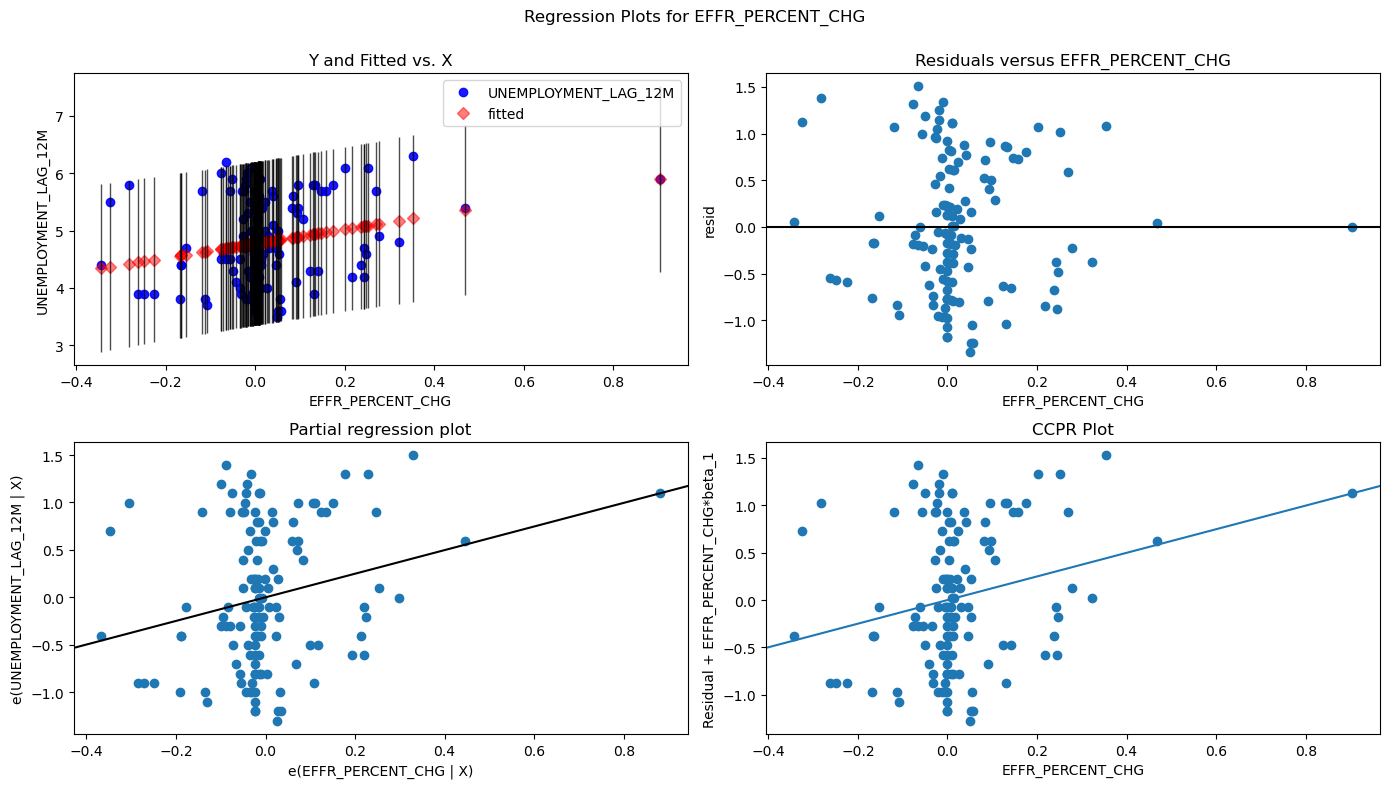

In [51]:
# fit simple linear regression model
mod = ols('UNEMPLOYMENT_LAG_12M ~ EFFR_PERCENT_CHG',
                   data=merged2).fit()
  
# display model summary
print(mod.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(mod,
                                    'EFFR_PERCENT_CHG',
                                    fig=fig)

                             OLS Regression Results                            
Dep. Variable:     CPI_PERCENT_LAG_12M   R-squared:                       0.349
Model:                             OLS   Adj. R-squared:                  0.345
Method:                  Least Squares   F-statistic:                     70.90
Date:                 Fri, 15 Sep 2023   Prob (F-statistic):           5.50e-14
Time:                         09:20:25   Log-Likelihood:                -234.34
No. Observations:                  134   AIC:                             472.7
Df Residuals:                      132   BIC:                             478.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1359      0.257      4.41

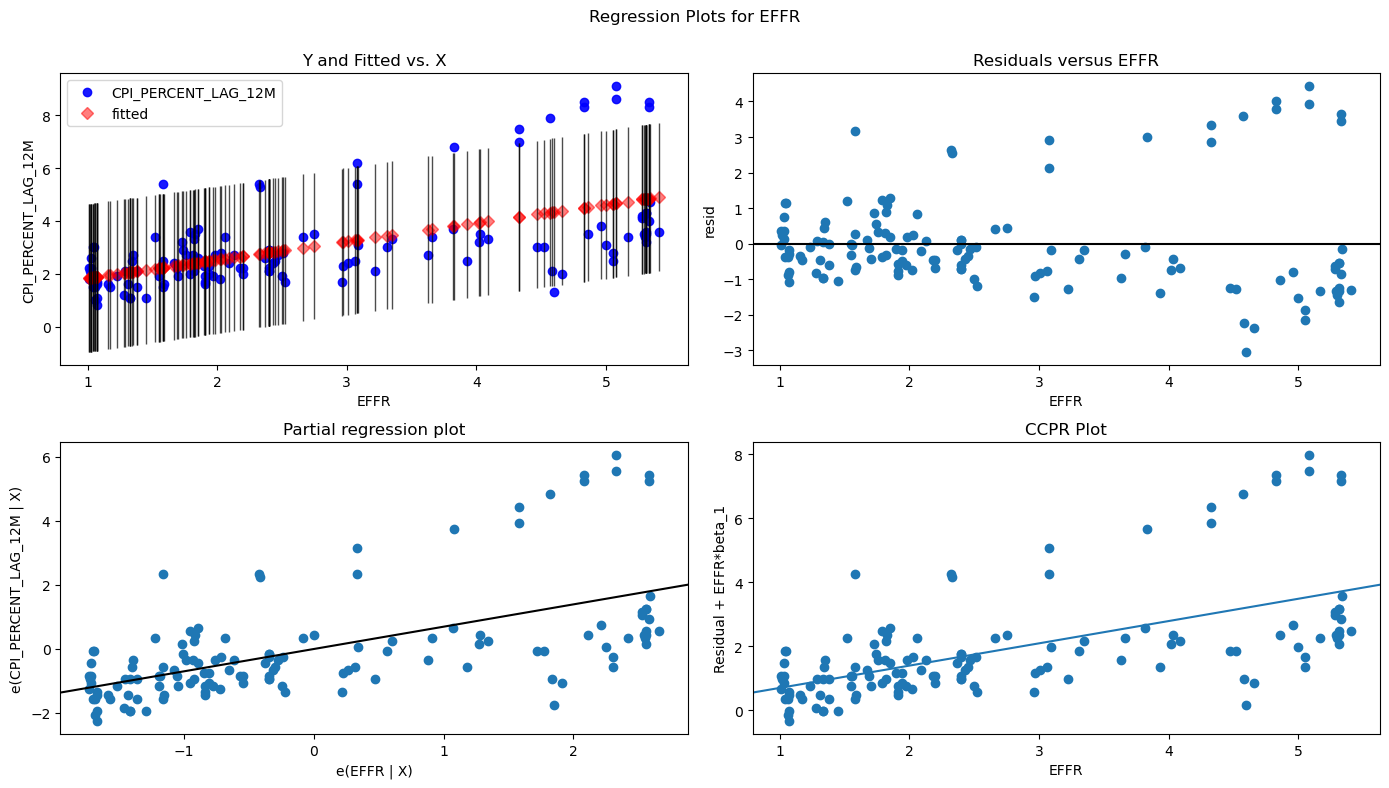

In [44]:
# fit simple linear regression model
mod = ols('CPI_PERCENT_LAG_12M ~ EFFR',
                   data=merged2).fit()
  
# display model summary
print(mod.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(mod,
                                    'EFFR',
                                    fig=fig)

In [10]:
# merged2 = pd.melt(merged, id_vars=['DATE'], var_name=['SIGNAL'], value_name='VALUE', ignore_index = False)
# merged2.sort_values(by=['DATE'], inplace=True)
# merged2.reset_index(drop=True, inplace=True)
# print(len(merged2))
# merged2.tail(n=10)

<Axes: xlabel='EFFR', ylabel='CPI_PERCENT'>

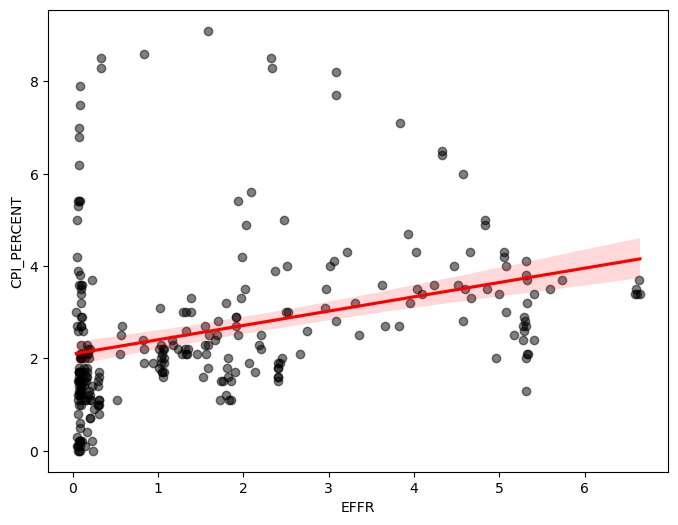

In [126]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(x = merged['EFFR'], y = merged['CPI_PERCENT'],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

In [ ]:
x = merged['EFFR']
y = merged['CPI_PERCENT']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

In [ ]:
x = merged['EFFR']
y = merged['UNEMPLOYMENT']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

In [ ]:
x = merged['CPI_PERCENT']
y = merged['UNEMPLOYMENT']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

In [ ]:
import numpy as np
from scipy import signal
rng = np.random.default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(100), x])
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

In [ ]:
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_effr_cpi = ccf_values(merged['EFFR'], merged['CPI_PERCENT'])

In [ ]:
lags = signal.correlation_lags(len(merged['EFFR']), len(merged['CPI_PERCENT']))
def ccf_plot(lags, ccf):
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation EFFR and CPI', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', 
    fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_effr_cpi)

In [ ]:
# For instance, the average CPI inflation rate was 3.56 percent from 1948 to 1978, and 3.74 percent 
# from 1979 (when the Fed first had a formal price stability mandate) to 2013. And from 2021 to 2023
# it has been above the mandate.

In [127]:
import numpy as np

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, curdoc

output_notebook()
curdoc().theme = 'dark_minimal'

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

dates = np.array(merged['DATE'], dtype=np.datetime64)
#effr_chg_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR_PERCENT_CHG']))
effr_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR']))
#cpi_src = ColumnDataSource(data=dict(date=dates, rate=merged['CPI_PERCENT']))
unemp_src = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT']))
unemp_lag_src = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT_LAG_12M']))

p = figure(title='EFFR vs Unemployment', height=300, sizing_mode='stretch_width', tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], dates[len(dates) - 1]))
           #background_fill_color="#efefef", x_range=(dates[0], dates[100]),)

#p.line('date', 'rate', source=effr_chg_src, color='#3195ce', legend_label='EFFR % (1-month change)')
p.line('date', 'rate', source=effr_src, color='#56B4E9', legend_label='Federal Funds')
#p.line('date', 'rate', source=cpi_src, color='#E69F00', legend_label='Inflation (12-month % change)')
p.line('date', 'rate', source=unemp_src, color='#E69F00', legend_label='Unemployment')
#p.line('date', 'rate', source=unemp_lag_src, color='#009E73', legend_label='Lagged Unemployment (12 Months)')
# p.line('date', 'rate', source=unemp_src, color='#009E73', legend_label='Unemployment')
p.yaxis.axis_label = 'Rate'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                toolbar_location=None)
                #toolbar_location=None, background_fill_color="#efefef")

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "white"
range_tool.overlay.fill_alpha = 0.2

#select.line('date', 'rate', source=effr_chg_src, color='#3195ce')
select.line('date', 'rate', source=effr_src, color='#56B4E9')
# select.line('date', 'rate', source=effr_src, color='#56B4E9')
#select.line('date', 'rate', source=cpi_src, color='#E69F00')
select.line('date', 'rate', source=unemp_src, color='#E69F00')
#select.line('date', 'rate', source=unemp_lag_src, color='#009E73')

select.ygrid.grid_line_color = None
select.add_tools(range_tool)


show(column(p, select))

Loading BokehJS ...

In [131]:
import numpy as np

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, curdoc

output_notebook()
curdoc().theme = 'dark_minimal'

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

dates = np.array(merged['DATE'], dtype=np.datetime64)
#effr_chg_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR_PERCENT_CHG']))
effr_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR']))
#cpi_src = ColumnDataSource(data=dict(date=dates, rate=merged['CPI_PERCENT']))
cpi_src = ColumnDataSource(data=dict(date=dates, rate=merged['CPI_PERCENT']))
#cpi_lag_src = ColumnDataSource(data=dict(date=dates, rate=merged['CPI_PERCENT_LAG_6M']))

p = figure(title='EFFR vs CPI', height=300, sizing_mode='stretch_width', tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], dates[len(dates) - 1]),)
           #background_fill_color="#efefef", x_range=(dates[0], dates[100]),)

#p.line('date', 'rate', source=effr_chg_src, color='#3195ce', legend_label='EFFR % (1-month change)')
p.line('date', 'rate', source=effr_src, color='#56B4E9', legend_label='Federal Funds')
#p.line('date', 'rate', source=cpi_src, color='#E69F00', legend_label='Inflation (12-month % change)')
p.line('date', 'rate', source=cpi_src, color='#E69F00', legend_label='CPI')
#p.line('date', 'rate', source=cpi_lag_src, color='#009E73', legend_label='CPI Lagged (6 Months)')
# p.line('date', 'rate', source=unemp_src, color='#009E73', legend_label='Unemployment')
p.yaxis.axis_label = 'Rate'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                toolbar_location=None)
                #toolbar_location=None, background_fill_color="#efefef")

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "white"
range_tool.overlay.fill_alpha = 0.2

#select.line('date', 'rate', source=effr_chg_src, color='#3195ce')
select.line('date', 'rate', source=effr_src, color='#56B4E9')
# select.line('date', 'rate', source=effr_src, color='#56B4E9')
#select.line('date', 'rate', source=cpi_src, color='#E69F00')
#select.line('date', 'rate', source=cpi_src, color='#E69F00')
select.line('date', 'rate', source=cpi_lag_src, color='#009E73')

select.ygrid.grid_line_color = None
select.add_tools(range_tool)


show(column(p, select))

Loading BokehJS ...

In [132]:
import numpy as np

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, curdoc

output_notebook()
curdoc().theme = 'dark_minimal'

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

dates = np.array(merged['DATE'], dtype=np.datetime64)
#effr_chg_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR_PERCENT_CHG']))
effr_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR']))
#cpi_src = ColumnDataSource(data=dict(date=dates, rate=merged['CPI_PERCENT']))
#cpi_src = ColumnDataSource(data=dict(date=dates, rate=merged['CPI_PERCENT']))
cpi_lag_src = ColumnDataSource(data=dict(date=dates, rate=merged['CPI_PERCENT_LAG_6M']))

p = figure(title='EFFR vs Lagged CPI (6 Month)', height=300, sizing_mode='stretch_width', tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], dates[len(dates) - 1]),)
           #background_fill_color="#efefef", x_range=(dates[0], dates[100]),)

#p.line('date', 'rate', source=effr_chg_src, color='#3195ce', legend_label='EFFR % (1-month change)')
p.line('date', 'rate', source=effr_src, color='#56B4E9', legend_label='Federal Funds')
#p.line('date', 'rate', source=cpi_src, color='#E69F00', legend_label='Inflation (12-month % change)')
#p.line('date', 'rate', source=cpi_src, color='#E69F00', legend_label='CPI')
p.line('date', 'rate', source=cpi_lag_src, color='#009E73', legend_label='CPI Lagged (6 Months)')
# p.line('date', 'rate', source=unemp_src, color='#009E73', legend_label='Unemployment')
p.yaxis.axis_label = 'Rate'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                toolbar_location=None)
                #toolbar_location=None, background_fill_color="#efefef")

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "white"
range_tool.overlay.fill_alpha = 0.2

#select.line('date', 'rate', source=effr_chg_src, color='#3195ce')
select.line('date', 'rate', source=effr_src, color='#56B4E9')
# select.line('date', 'rate', source=effr_src, color='#56B4E9')
#select.line('date', 'rate', source=cpi_src, color='#E69F00')
#select.line('date', 'rate', source=cpi_src, color='#E69F00')
select.line('date', 'rate', source=cpi_lag_src, color='#009E73')

select.ygrid.grid_line_color = None
select.add_tools(range_tool)


show(column(p, select))

Loading BokehJS ...

In [67]:
import numpy as np

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool, Span, BoxAnnotation, Label
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

output_notebook()

Loading BokehJS ...

In [134]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

curdoc().theme = 'dark_minimal'

dates = np.array(merged['DATE'], dtype=np.datetime64)
unemp_src = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT']))

p = figure(title='Unemployment vs 4% Fed target', height=300, sizing_mode='stretch_width', tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], dates[len(dates) - 1]),)

p.line('date', 'rate', source=unemp_src, color='#009E73', legend_label='Unemployment')
p.yaxis.axis_label = 'Rate'

#p.hspan(y=[merged['UNEMPLOYMENT'].mean()],line_width=[1], line_color="#E69F00", line_dash='dashed')
p.hspan(y=[4.0],line_width=[1], line_color="red")

black_swan_events = [
    ('9/11', pd.to_datetime('2001-09-11'), 15),
    ('SARS', pd.to_datetime('2003-01-14'), 40),
    ('Global Financial Crisis', pd.to_datetime('2007-10-09'), 1022),
    ('Libya Intervention', pd.to_datetime('2011-02-18'), 29),
    ('Brexit', pd.to_datetime('2016-06-08'), 9),
    ('COVID-19', pd.to_datetime('2019-02-19'), 1500)
    ]
for bse in black_swan_events:
    box = BoxAnnotation(left=bse[1], right=bse[1] + timedelta(days=bse[2]), fill_alpha=0.2, fill_color='pink')
    label = Label(x=bse[1], y=0, x_units='data', y_units='screen', text=bse[0],
              border_line_color=None, text_font_size='10px',text_color='white',
              background_fill_color=None, background_fill_alpha=1.0)    
    p.add_layout(box)
    p.add_layout(label)
    
range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "white"
range_tool.overlay.fill_alpha = 0.2

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None)


select.line('date', 'rate', source=unemp_src, color='#009E73')
select.ygrid.grid_line_color = None
select.add_tools(range_tool)


show(column(p, select))

In [15]:
merged['UNEMPLOYMENT'].mean()

5.8323741007194245

<Axes: xlabel='EFFR', ylabel='CPI_PERCENT'>

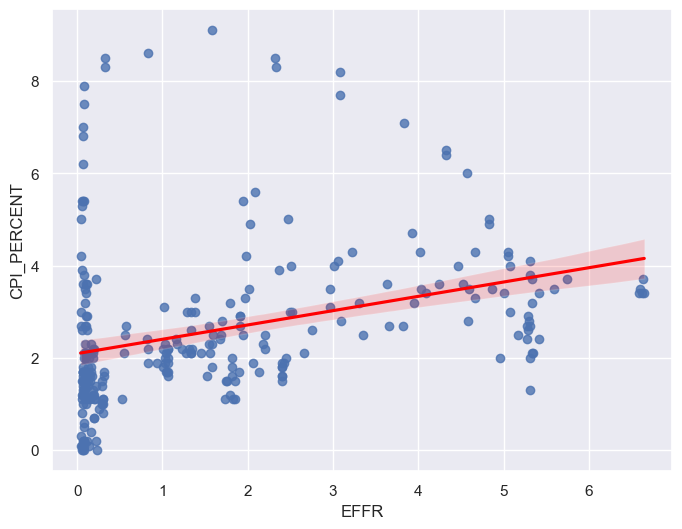

In [23]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(x = merged['EFFR'], y = merged['CPI_PERCENT'],
#             scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

<Axes: xlabel='EFFR', ylabel='UNEMPLOYMENT'>

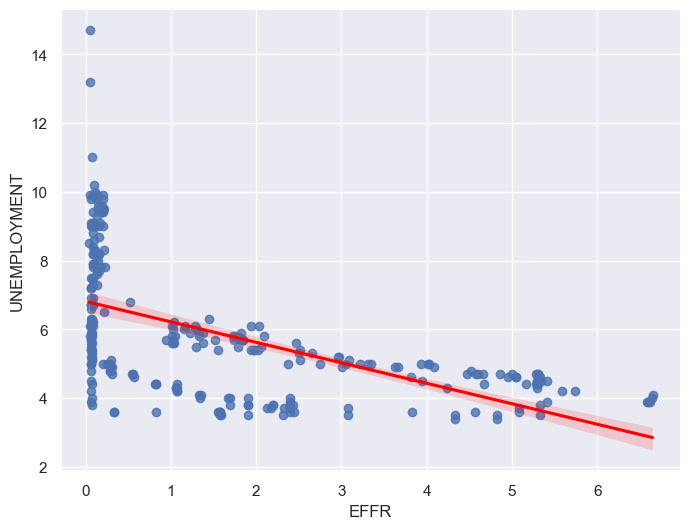

In [24]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(x = merged['EFFR'], y = merged['UNEMPLOYMENT'],
#             scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

In [25]:
merged['EFFR'].corr(merged['CPI_PERCENT'])


0.330535761041365

In [26]:
merged['EFFR'].corr(merged['UNEMPLOYMENT'])

-0.5587227803665135

In [28]:
ccf_effr_cpi = ccf_values(merged['EFFR'], merged['CPI_PERCENT'])

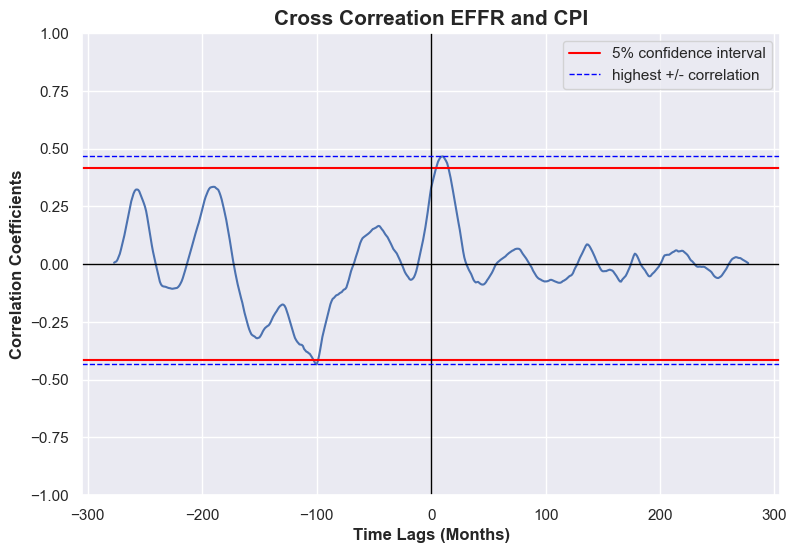

In [29]:
lags = signal.correlation_lags(len(merged['EFFR']), len(merged['CPI_PERCENT']))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation EFFR and CPI', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags (Months)', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_effr_cpi)